# $\alpha$-Rational Inattention

## Optimal Consideration Sets




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from blahut_arimoto import BA
from alpha_blahut_arimoto import alpha_BA


In [2]:
sns.set_style('whitegrid')
colors = sns.color_palette("ch:3,r=.2,l=.6")

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

# import os

# cwdir = %pwd
# fig_dir = os.path.abspath(os.path.join(cwdir, '../figures'))

In [3]:
# Example for basic computations

# Payoff-matrix -- stateXactions
U = np.array([[1, 0], [0, 1]])

print('=================================================')
print('Payoff matrix -- state times action')
print(U)

# Initial belief over states
mu = np.array([.5, .5])

# Multiplier on cost of information
k = 1

Payoff matrix -- state times action
[[1 0]
 [0 1]]


In [4]:
def alpha_MI(P, mu, a, k):
    """
    alpha-mutual information costs of experiment P.
    Handles Shannon case.
    """
    if a == 1:
        K = k*np.sum((mu[:, np.newaxis] * P) * np.log(P/(mu@P)))
    else:
        K = k*a/(a - 1)*np.log(np.sum(np.sum(P**a * mu[:, np.newaxis], axis=0)**(1/a)))
    return K

In [5]:
def alpha_netU(U, P, mu, a, k):
    """Net utility under alpha-mutual information costs."""
    return  np.sum((U * P * mu[:, np.newaxis])) - alpha_MI(P, mu, a, k)

## Consideration sets

Binary decision problem with asymmetric prior

In [6]:
al = .75
ah = 1.5

priors = np.sort(1 - np.geomspace(0.05, .5, 20))

muPs_Sh = []
muPs_al = []
muPs_ah = []

netU_Sh = []
netU_al = []
netU_ah = []

for prior in priors:
    mu = np.array([prior, 1-prior])
    # Shannon
    RI = BA(U, k, mu)
    q_Sh, P_Sh = RI.opt_strat()
    muPs_Sh.append(q_Sh[0])
    netU_Sh.append(alpha_netU(U, P_Sh, mu, 1, k))
    # alpha = .6
    RI_al = alpha_BA(U, k, mu, al)
    _, _, Ps_al = RI_al.opt_strat(tol=1e-12)
    muPs_al.append((mu @ Ps_al)[0])
    netU_al.append(alpha_netU(U, Ps_al, mu, al, k))
    # alpha = 1.4
    RI_ah = alpha_BA(U, k, mu, ah)
    _, _, Ps_ah = RI_ah.opt_strat(tol=1e-12)
    muPs_ah.append((mu @ Ps_ah)[0])
    netU_ah.append(alpha_netU(U, Ps_ah, mu, ah, k))
    
# deal with corner
priors = np.append(priors, 1)
muPs_Sh.append(1)
muPs_al.append(1)
muPs_ah.append(1)
netU_Sh.append(1)
netU_al.append(1)
netU_ah.append(1)

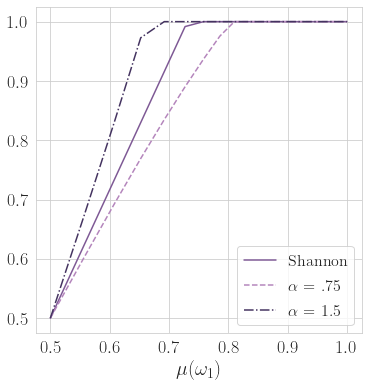

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(priors, muPs_Sh, label="Shannon", color=colors[2], linestyle='-')
ax.plot(priors, muPs_al, label=r"$\alpha$ = .75", color=colors[0], linestyle='--')
ax.plot(priors, muPs_ah, label=r"$\alpha$ = 1.5", color=colors[4], linestyle='-.')
ax.set_aspect('equal')
ax.legend(fontsize=16)
ax.set(xlabel=r'$\mu(\omega_1)$')
# ax.set_title(r'Probability of taking action $a$, $\mu P_{\mathcal{S}}(a)$',
#              loc='left', pad=10, fontsize=18)

# sns.despine()
# plt.savefig(os.path.join(fig_dir, 'consideration_prob.pdf'), format='pdf', dpi=1200, bbox_inches='tight')
plt.show()

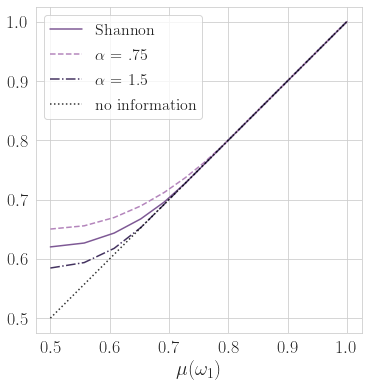

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(priors, netU_Sh, label="Shannon", color=colors[2], linestyle='-')
ax.plot(priors, netU_al, label=r"$\alpha$ = .75", color=colors[0],linestyle='--')
ax.plot(priors, netU_ah, label=r"$\alpha$ = 1.5", color=colors[4], linestyle='-.')
ax.plot(priors, priors, label="no information", color='k', linestyle=':', alpha=.8)
ax.set_aspect('equal')
ax.legend(fontsize=16)
ax.set_xlabel(r'$\mu(\omega_1)$')
# ax.set_title(r'Expected utility net of information costs', 
#              loc='left', pad=10, fontsize=18)

# plt.savefig(os.path.join(fig_dir, 'consideration_netU.pdf'), format='pdf', dpi=1200, bbox_inches='tight')
plt.show()